In [48]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [49]:
def drawImage(img,title="Image"):
    plt.imshow(img,cmap="gray")
    plt.axis("off")
    plt.title(title + str(img.shape))
    plt.show()

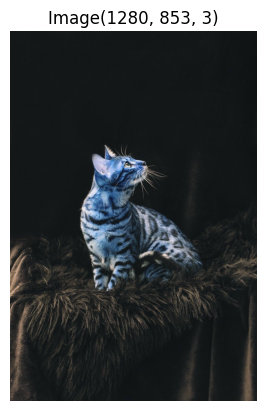

In [50]:
img = cv2.imread("./bengal-cat-g852a4c82c_1280.jpg")
drawImage(img)

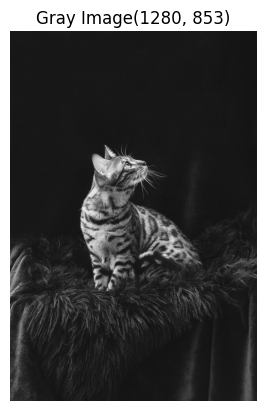

In [51]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
drawImage(gray,"Gray Image")

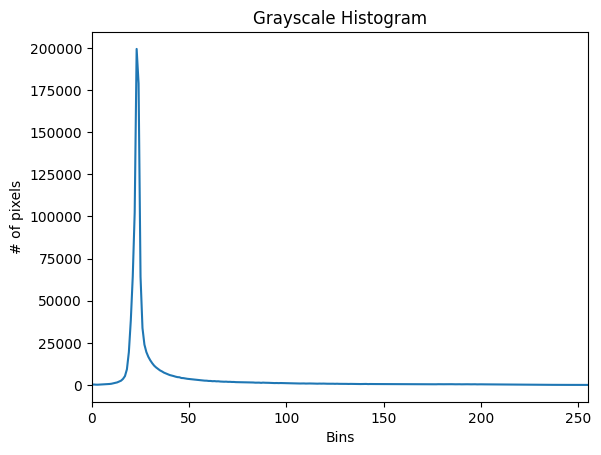

In [52]:
gray_hist = cv2.calcHist([gray],[0],None,[256],[0,256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
plt.plot(gray_hist)
plt.xlim([0,255])
plt.show()

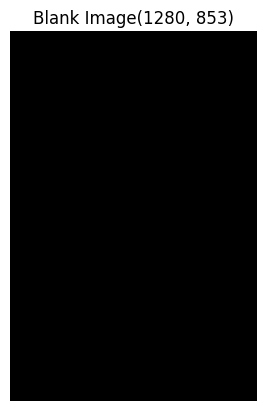

In [53]:
blank = np.zeros(img.shape[:2],dtype="uint8")
drawImage(blank,title="Blank Image")

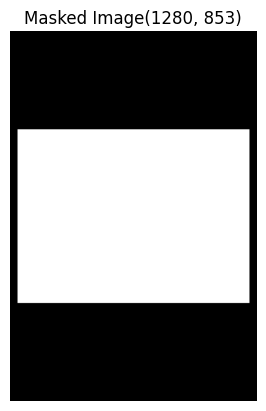

In [54]:
mask = cv2.rectangle(blank.copy(),(img.shape[1]//2 - 400,img.shape[0]//2 - 300),(img.shape[1]//2 + 400,img.shape[0]//2 + 300),255,-1)
drawImage(mask,title="Masked Image")

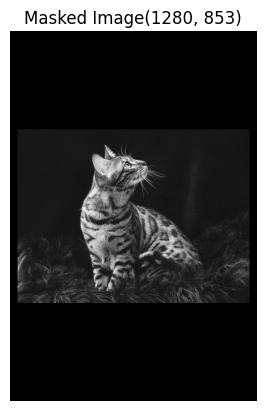

In [55]:
masked_image = cv2.bitwise_and(gray,gray,mask=mask)
drawImage(masked_image,"Masked Image")

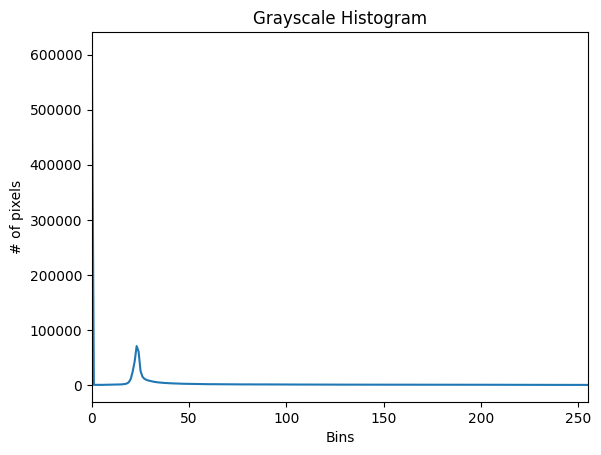

In [56]:
gray_hist = cv2.calcHist([masked_image],[0],None,[256],[0,256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
plt.plot(gray_hist)
plt.xlim([0,255])
plt.show()

### ColoredHistogram

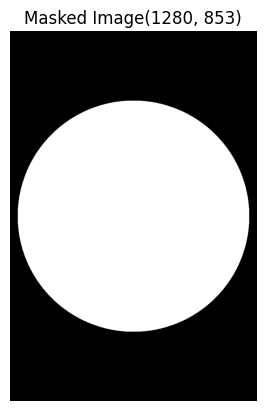

In [57]:
circle_mask = cv2.circle(blank.copy(),(img.shape[1]//2,img.shape[0]//2),400,255,-1)
drawImage(circle_mask,title="Masked Image")

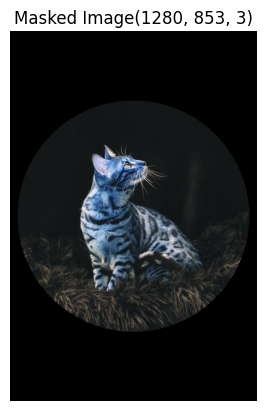

In [62]:
circular_masked_image = cv2.bitwise_and(img,img,mask=circle_mask)
drawImage(circular_masked_image,"Masked Image")

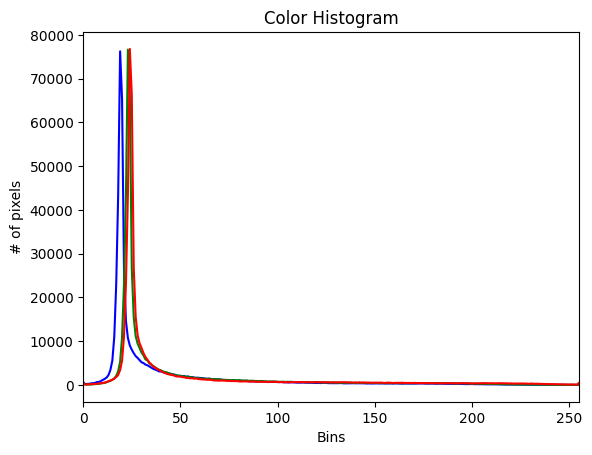

In [66]:
colors = ("b","g","r")
plt.figure()
plt.title("Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
for i,col in enumerate(colors):
    hist = cv2.calcHist([img],[i],circle_mask,[256],[0,256])
    plt.plot(hist,color=col)
    plt.xlim([0,255])
plt.show()